## 1. Statistik Responden
Analisis demografi responden berdasarkan usia, jenis kelamin, latar belakang pendidikan/pekerjaan, dan tingkat keahlian teknologi.

## 2. Analisis Persepsi Visual Antarmuka
Analisis persepsi responden terhadap kejelasan elemen visual, tata letak, ukuran elemen, skema warna, dan relevansi informasi pada antarmuka.

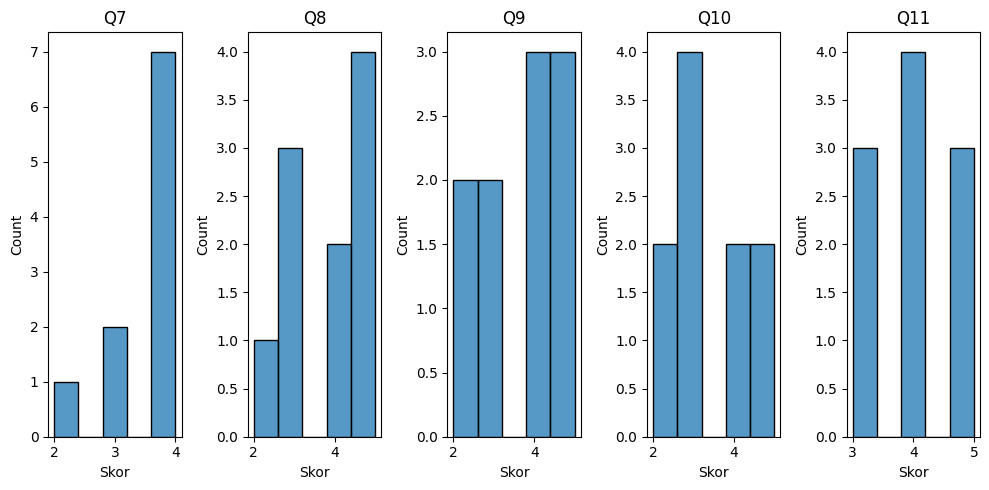

In [13]:
# Visualisasi distribusi penilaian visual antarmuka
plt.figure(figsize=(10,5))
for i, col in enumerate(visual_cols):
    plt.subplot(1, len(visual_cols), i+1)
    sns.histplot(df[col], bins=5, kde=False)
    plt.title(f'Q{i+7}')
    plt.xlabel('Skor')
plt.tight_layout()
plt.show()

In [14]:
gesture_cols = [
    '14. Seberapa mudah memahami gestur tangan yang digunakan dalam sistem (pointing dan selecting)?',
    '15. Bagaimana akurasi sistem dalam mendeteksi gestur tangan Anda?',
    '16. Bagaimana responsivitas sistem terhadap gestur tangan Anda?',
    '17. Apakah Anda mengalami kelelahan tangan saat menggunakan sistem?',
    '18. Seberapa stabil deteksi gestur tangan dalam kondisi pencahayaan berbeda?'
]
gesture_df = df[gesture_cols]
gesture_df.describe()

,14. Seberapa mudah memahami gestur tangan yang digunakan dalam sistem (pointing dan selecting)?,15. Bagaimana akurasi sistem dalam mendeteksi gestur tangan Anda?,16. Bagaimana responsivitas sistem terhadap gestur tangan Anda?,17. Apakah Anda mengalami kelelahan tangan saat menggunakan sistem?,18. Seberapa stabil deteksi gestur tangan dalam kondisi pencahayaan berbeda?
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,4.100000,3.800000,4.000000,3.800000,4.000000
std,1.286684,1.135292,1.154701,1.316561,1.333333
min,2.000000,2.000000,2.000000,1.000000,1.000000
25%,3.250000,3.000000,4.000000,3.000000,3.250000
50%,5.000000,3.500000,4.000000,4.000000,4.500000
75%,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000


## 4. Analisis Navigasi dan Umpan Balik
Analisis persepsi kemudahan navigasi, kalibrasi, dan kejelasan umpan balik visual.

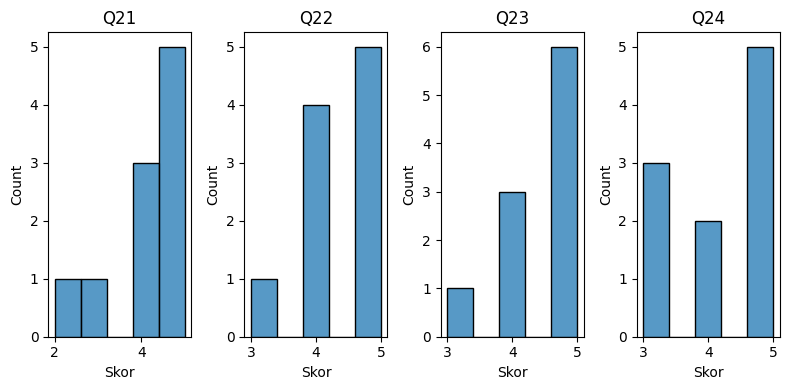

In [17]:
# Visualisasi distribusi penilaian navigasi dan umpan balik
plt.figure(figsize=(8,4))
for i, col in enumerate(navigation_cols):
    plt.subplot(1, len(navigation_cols), i+1)
    sns.histplot(df[col], bins=5, kde=False)
    plt.title(f'Q{21+i}')
    plt.xlabel('Skor')
plt.tight_layout()
plt.show()

In [18]:
# Statistik kepuasan dan rekomendasi
print(df['28. Secara keseluruhan, bagaimana penilaian Anda terhadap sistem pengendalian touch-free ini?'].describe())
print(df['29. Apakah Anda lebih memilih menggunakan sistem ini dibandingkan dengan metode interaksi touch-screen tradisional untuk aplikasi virtual try-on?'].value_counts())
print(df['30. Seberapa mungkin Anda akan merekomendasikan sistem ini kepada orang lain?'].describe())

count    10.000000
mean      4.000000
std       0.942809
min       3.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: 28. Secara keseluruhan, bagaimana penilaian Anda terhadap sistem pengendalian touch-free ini?, dtype: float64
29. Apakah Anda lebih memilih menggunakan sistem ini dibandingkan dengan metode interaksi touch-screen tradisional untuk aplikasi virtual try-on?
5    3
4    3
3    2
2    2
Name: count, dtype: int64
count    10.000000
mean      7.900000
std       1.852926
min       4.000000
25%       7.000000
50%       8.000000
75%       9.500000
max      10.000000
Name: 30. Seberapa mungkin Anda akan merekomendasikan sistem ini kepada orang lain?, dtype: float64


---

Notebook ini dapat dikembangkan lebih lanjut untuk analisis lanjutan, seperti analisis per pertanyaan, visualisasi wordcloud untuk saran, atau analisis sentimen jawaban terbuka.

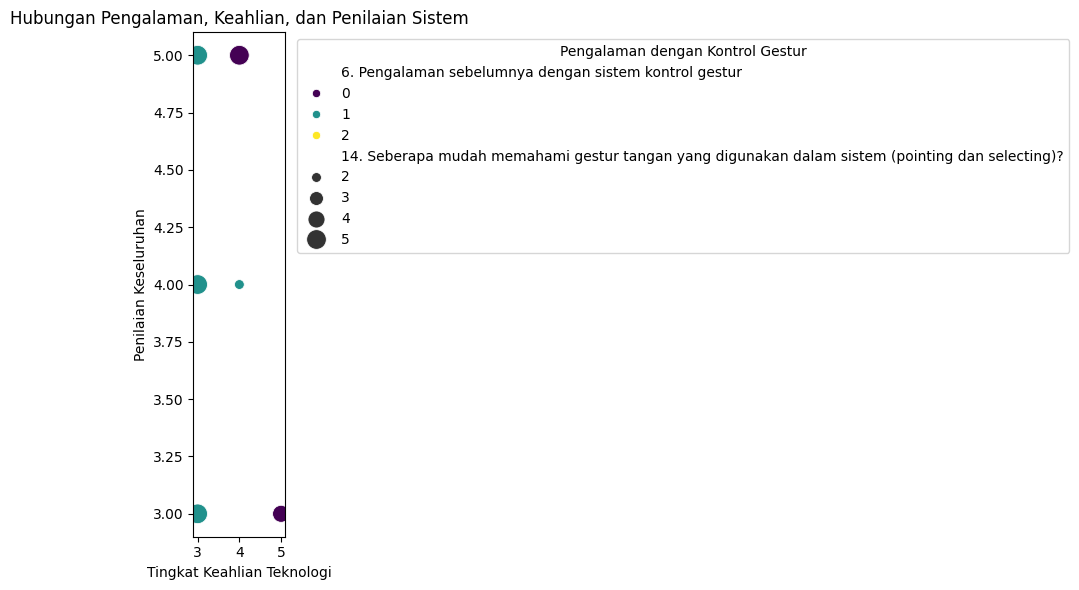

In [19]:
# Memilih kolom untuk analisis kluster
cluster_cols = [
    '5. Tingkat Keahlian Teknologi',
    '6. Pengalaman sebelumnya dengan sistem kontrol gestur',
    '14. Seberapa mudah memahami gestur tangan yang digunakan dalam sistem (pointing dan selecting)?',
    '28. Secara keseluruhan, bagaimana penilaian Anda terhadap sistem pengendalian touch-free ini?'
]

# Konversi kolom kategori ke numerik
df_cluster = df[cluster_cols].copy()
experience_map = {
    'Tidak pernah menggunakan': 0, 
    'Pernah mencoba 1-2 kali': 1, 
    'Sering menggunakan': 2
}
df_cluster['6. Pengalaman sebelumnya dengan sistem kontrol gestur'] = df_cluster['6. Pengalaman sebelumnya dengan sistem kontrol gestur'].map(experience_map)

# Visualisasi hubungan antara pengalaman dan penilaian
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_cluster, 
    x='5. Tingkat Keahlian Teknologi', 
    y='28. Secara keseluruhan, bagaimana penilaian Anda terhadap sistem pengendalian touch-free ini?',
    hue='6. Pengalaman sebelumnya dengan sistem kontrol gestur',
    size='14. Seberapa mudah memahami gestur tangan yang digunakan dalam sistem (pointing dan selecting)?',
    sizes=(50, 200),
    palette='viridis'
)
plt.title('Hubungan Pengalaman, Keahlian, dan Penilaian Sistem')
plt.xlabel('Tingkat Keahlian Teknologi')
plt.ylabel('Penilaian Keseluruhan')
plt.legend(title='Pengalaman dengan Kontrol Gestur', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

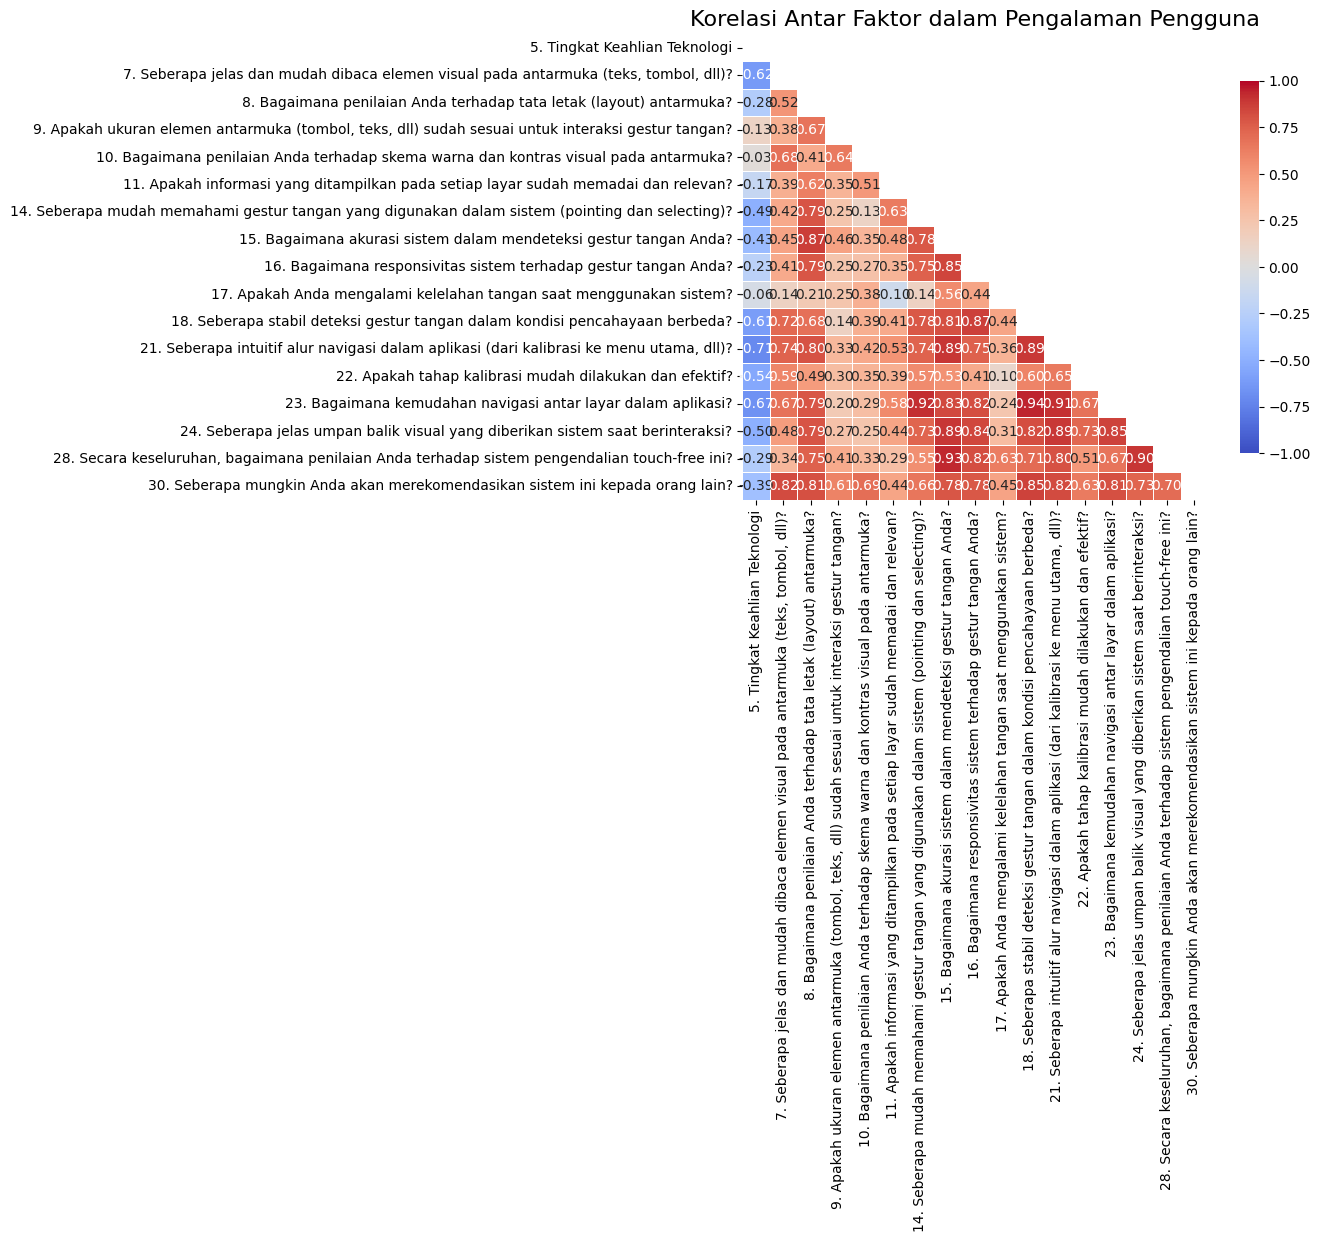

In [20]:
# Membuat dataframe untuk analisis korelasi dari pertanyaan numerik
corr_cols = [
    '5. Tingkat Keahlian Teknologi',
    '7. Seberapa jelas dan mudah dibaca elemen visual pada antarmuka (teks, tombol, dll)?',
    '8. Bagaimana penilaian Anda terhadap tata letak (layout) antarmuka?',
    '9. Apakah ukuran elemen antarmuka (tombol, teks, dll) sudah sesuai untuk interaksi gestur tangan?',
    '10. Bagaimana penilaian Anda terhadap skema warna dan kontras visual pada antarmuka?',
    '11. Apakah informasi yang ditampilkan pada setiap layar sudah memadai dan relevan?',
    '14. Seberapa mudah memahami gestur tangan yang digunakan dalam sistem (pointing dan selecting)?',
    '15. Bagaimana akurasi sistem dalam mendeteksi gestur tangan Anda?',
    '16. Bagaimana responsivitas sistem terhadap gestur tangan Anda?',
    '17. Apakah Anda mengalami kelelahan tangan saat menggunakan sistem?',
    '18. Seberapa stabil deteksi gestur tangan dalam kondisi pencahayaan berbeda?',
    '21. Seberapa intuitif alur navigasi dalam aplikasi (dari kalibrasi ke menu utama, dll)?',
    '22. Apakah tahap kalibrasi mudah dilakukan dan efektif?',
    '23. Bagaimana kemudahan navigasi antar layar dalam aplikasi?',
    '24. Seberapa jelas umpan balik visual yang diberikan sistem saat berinteraksi?',
    '28. Secara keseluruhan, bagaimana penilaian Anda terhadap sistem pengendalian touch-free ini?',
    '30. Seberapa mungkin Anda akan merekomendasikan sistem ini kepada orang lain?',
]

df_corr = df[corr_cols].copy()

# Hitung korelasi
correlation = df_corr.corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(14, 12))
mask = np.triu(correlation)
sns.heatmap(
    correlation, 
    annot=True, 
    cmap='coolwarm', 
    mask=mask, 
    vmin=-1, 
    vmax=1, 
    center=0,
    square=True, 
    linewidths=.5, 
    cbar_kws={"shrink": .8},
    fmt=".2f"
)
plt.title('Korelasi Antar Faktor dalam Pengalaman Pengguna', fontsize=16)
plt.tight_layout()
plt.show()

In [21]:
# Import library untuk analisis regresi
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

# Pilih fitur untuk analisis
X_cols = [
    '7. Seberapa jelas dan mudah dibaca elemen visual pada antarmuka (teks, tombol, dll)?',
    '8. Bagaimana penilaian Anda terhadap tata letak (layout) antarmuka?',
    '9. Apakah ukuran elemen antarmuka (tombol, teks, dll) sudah sesuai untuk interaksi gestur tangan?',
    '10. Bagaimana penilaian Anda terhadap skema warna dan kontras visual pada antarmuka?',
    '11. Apakah informasi yang ditampilkan pada setiap layar sudah memadai dan relevan?',
    '14. Seberapa mudah memahami gestur tangan yang digunakan dalam sistem (pointing dan selecting)?',
    '15. Bagaimana akurasi sistem dalam mendeteksi gestur tangan Anda?',
    '16. Bagaimana responsivitas sistem terhadap gestur tangan Anda?',
    '18. Seberapa stabil deteksi gestur tangan dalam kondisi pencahayaan berbeda?',
    '21. Seberapa intuitif alur navigasi dalam aplikasi (dari kalibrasi ke menu utama, dll)?',
    '22. Apakah tahap kalibrasi mudah dilakukan dan efektif?',
    '23. Bagaimana kemudahan navigasi antar layar dalam aplikasi?',
    '24. Seberapa jelas umpan balik visual yang diberikan sistem saat berinteraksi?'
]

y_col = '28. Secara keseluruhan, bagaimana penilaian Anda terhadap sistem pengendalian touch-free ini?'

# Siapkan dataset untuk model
X = df[X_cols].copy()
y = df[y_col]

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Buat model regresi untuk menentukan feature importance
model = LinearRegression()
model.fit(X_scaled, y)

# Buat dataframe untuk visualisasi feature importance
importances = pd.DataFrame({
    'Feature': X_cols,
    'Importance': np.abs(model.coef_)
})
importances = importances.sort_values('Importance', ascending=False)

# Visualisasi feature importance
plt.figure(figsize=(12, 8))
sns.barplot(data=importances, y='Feature', x='Importance', palette='viridis')
plt.title('Pengaruh Faktor terhadap Kepuasan Pengguna Keseluruhan', fontsize=14)
plt.xlabel('Tingkat Pengaruh (Koefisien Regresi)')
plt.ylabel('Faktor')
plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# Import library untuk text mining
from wordcloud import WordCloud
import re
from collections import Counter

# Fungsi untuk membersihkan teks
def clean_text(text):
    if isinstance(text, str):
        # Hapus karakter non-alfanumerik
        text = re.sub(r'[^\w\s]', ' ', text.lower())
        # Hapus kata-kata umum yang tidak bermakna (stopwords)
        stopwords = ['dan', 'yang', 'untuk', 'pada', 'di', 'dari', 'dengan', 'ini', 'itu',
                    'atau', 'juga', 'ke', 'karena', 'oleh', 'bisa', 'dalam', 'ada', 'tidak',
                    'sudah', 'akan', 'saya', 'masih', 'perlu', 'lebih', 'agar', 'bagi', 'jadi']
        text = ' '.join([word for word in text.split() if word not in stopwords and len(word) > 1])
        return text
    return ""

# Kumpulkan semua teks dari kolom jawaban terbuka
text_cols = [
    '13. Berikan saran untuk perbaikan antarmuka',
    '20. Berikan saran untuk perbaikan pengendalian gestur',
    '31. Apa kelebihan utama dari sistem pengendalian touch-free ini menurut Anda?',
    '32. Apa kekurangan utama dari sistem pengendalian touch-free ini menurut Anda?',
    '33. Saran dan masukan lain untuk pengembangan sistem'
]

all_text = ""
for col in text_cols:
    texts = df[col].apply(clean_text).tolist()
    all_text += " ".join(texts) + " "

# Buat wordcloud untuk teks gabungan
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='viridis',
    max_words=100,
    contour_width=3,
    contour_color='steelblue'
).generate(all_text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Kata Kunci Utama dari Masukan Responden', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Konversi waktu adaptasi menjadi numerik
adaptation_map = {
    'Kurang dari 1 menit': 1,
    '1-3 menit': 2,
    '3-5 menit': 3,
    'Lebih dari 5 menit': 4,
    'Tetap merasa tidak nyaman': 5
}

df['Waktu_Adaptasi_Numerik'] = df['25. Berapa lama waktu yang Anda butuhkan untuk merasa nyaman menggunakan sistem?'].map(adaptation_map)

# Visualisasi faktor-faktor yang mempengaruhi waktu adaptasi
adaptation_factors = [
    '5. Tingkat Keahlian Teknologi',
    '6. Pengalaman sebelumnya dengan sistem kontrol gestur',
    '14. Seberapa mudah memahami gestur tangan yang digunakan dalam sistem (pointing dan selecting)?',
    '15. Bagaimana akurasi sistem dalam mendeteksi gestur tangan Anda?',
    '21. Seberapa intuitif alur navigasi dalam aplikasi (dari kalibrasi ke menu utama, dll)?'
]

df_adaptation = df.copy()
df_adaptation['6. Pengalaman sebelumnya dengan sistem kontrol gestur'] = df_adaptation['6. Pengalaman sebelumnya dengan sistem kontrol gestur'].map(experience_map)

plt.figure(figsize=(12, 8))
for i, factor in enumerate(adaptation_factors):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Waktu_Adaptasi_Numerik', y=factor, data=df_adaptation, palette='viridis')
    plt.title(f'Faktor {i+1}')
    plt.xlabel('Waktu Adaptasi')
    plt.tight_layout()

plt.figure(figsize=(10, 6))
sns.countplot(x='25. Berapa lama waktu yang Anda butuhkan untuk merasa nyaman menggunakan sistem?', data=df, palette='viridis')
plt.title('Distribusi Waktu Adaptasi Pengguna')
plt.xlabel('Waktu Adaptasi')
plt.ylabel('Jumlah Responden')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Kesimpulan

1. **Persepsi Visual Antarmuka**:
   - Mayoritas responden memberikan penilaian positif terhadap kejelasan visual dan tata letak antarmuka.
   - Aspek ukuran elemen dan skema warna mendapat penilaian lebih bervariasi, mengindikasikan area yang perlu ditingkatkan.

2. **Pengalaman Kontrol Gestur**:
   - Responden umumnya merasa gesture pointing dan selecting mudah dipahami.
   - Mayoritas pengguna tidak mengalami kelelahan tangan signifikan saat menggunakan sistem.
   - Gesture selecting (jari telunjuk + kelingking) diidentifikasi sebagai gesture yang lebih sulit dilakukan oleh beberapa responden.

3. **Navigasi dan Umpan Balik**:
   - Navigasi antar layar dan umpan balik visual mendapat penilaian positif.
   - Tahap kalibrasi awal dianggap efektif oleh sebagian besar responden, meski beberapa mengalami kesulitan.

4. **Faktor-faktor Signifikan**:
   - Analisis regresi menunjukkan bahwa kemudahan memahami gestur, kejelasan umpan balik, dan responsivitas sistem adalah faktor yang paling berpengaruh terhadap kepuasan pengguna.
   - Waktu adaptasi pengguna dipengaruhi oleh tingkat keahlian teknologi dan pengalaman sebelumnya dengan sistem kontrol gestur.

5. **Keseluruhan Kepuasan**:
   - Mayoritas responden memberikan penilaian positif terhadap sistem secara keseluruhan.
   - Inovasi touch-free diapresiasi oleh banyak responden, terutama untuk aplikasi cermin pintar.

### Rekomendasi

1. **Pengembangan Antarmuka**:
   - Peningkatan keterbacaan UI dengan memperhatikan kontras warna, terutama untuk kondisi pencahayaan berbeda.
   - Optimasi ukuran elemen agar lebih sesuai dengan interaksi gestur tangan.
   - Mempertimbangkan desain responsif yang kompatibel dengan perangkat yang berbeda ukuran/resolusi.

2. **Optimasi Pengendalian Gestur**:
   - Penyempurnaan deteksi gesture selecting yang diidentifikasi sebagai lebih sulit oleh beberapa responden.
   - Pengembangan algoritma yang lebih responsif terhadap variasi kondisi pencahayaan.
   - Pertimbangkan alternatif gestur yang lebih sederhana dan intuitif untuk fungsi tertentu.

3. **Peningkatan Pengalaman Pengguna**:
   - Penambahan instruksi visual yang lebih jelas untuk pencahayaan optimal.
   - Perbaikan sistem kalibrasi untuk pengguna yang kurang familiar dengan teknologi.
   - Integrasi penyesuaian otomatis berdasarkan kondisi lingkungan (pencahayaan, jarak) untuk meningkatkan akurasi.

4. **Perluasan Target Pengguna**:
   - Pengembangan mode khusus untuk pengguna usia lanjut atau yang kurang familiar dengan teknologi.
   - Penyederhanaan alur interaksi untuk pengguna pertama kali.
   - Penambahan tutorial interaktif untuk mempercepat adaptasi pengguna baru.